## Task: Train a logistic regression classifier to predict survival of passengers in titanic dataset

You are provided with code to download and load titanic dataset in the form of a csv

In the dataset, each row represents information about the passengers of titanic, Like their name, gender, class etc(See the dataframe below for more info).

The target column is 'Survived' which tells us whether this particular passenger sirvived or not

Use any of all the other columns as the input features (You can choose to drop the columns you see are not worth keeping).

Your task is to train a logistic regression model which takes the input featues (make sure to not accidentaly feed the 'Survived' column to the model as input) and predicts the whether a passenger with these features would survive or not.

Make sure to put emphasis on code quality and to include a way to judge how good your model is performing on **un-seen data (untrained data)**.

As a bonus, see if you can figure out which feature is most likely to affect the survivability of a passenger.

In [12]:
from IPython.display import clear_output

In [13]:
#Don't change this code

%pip install gdown==4.5

clear_output()

In [14]:
!gdown 18YfCgT3Rk7uYWrUzgjb2UR3Nyo9Z68bK 

Downloading...
From: https://drive.google.com/uc?id=18YfCgT3Rk7uYWrUzgjb2UR3Nyo9Z68bK
To: c:\Users\Naif4\Desktop\Exam\Q2\titanic.csv

  0%|          | 0.00/60.3k [00:00<?, ?B/s]
100%|██████████| 60.3k/60.3k [00:00<00:00, 331kB/s]
100%|██████████| 60.3k/60.3k [00:00<00:00, 331kB/s]


In [1]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from torch.optim import SGD
import torch.nn as nn
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
titanic_data = pd.read_csv('titanic.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
data_y = titanic_data['Survived']

data_x = titanic_data.drop(
    columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])
data_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [15]:
for column in data_x.columns:
    if data_x[column].dtype == 'object':
            label_encoder = LabelEncoder()
            data_x[column] = label_encoder.fit_transform(data_x[column])


date_x_copy = data_x.copy()
data_x = data_x.replace(np.nan, date_x_copy.mean())

data_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [6]:
data_y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [7]:

class LogisticRegression(nn.Module):

  def __init__(self, input_dim):

    super(LogisticRegression, self).__init__()

    self.linear_weights = nn.Linear(input_dim, 1)

  
    self.sigmoid = nn.Sigmoid()
    

  def forward(self, x):

    y = self.linear_weights(x)

    z = self.sigmoid(y)  # a sigmoid over a linear layer output

    return z





In [8]:
data_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [9]:
X = data_x
Y = data_y

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32)

In [10]:
input_dim = X_train.shape[1]
model = LogisticRegression(input_dim)


criterion = nn.BCELoss()
optimizer = SGD(model.parameters(), lr=0.01)

num_epochs = 4000
lr = 1e-2

In [11]:
train_losses = []


for epoch in range(num_epochs):

  outputs = model(X_train)
  loss = criterion(outputs, y_train.unsqueeze(dim=-1))


  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  train_losses.append(loss.item())

  if (epoch + 1) % 500 == 0:
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [500/4000], Loss: 0.4805
Epoch [1000/4000], Loss: 0.4499
Epoch [1500/4000], Loss: 0.4421
Epoch [2000/4000], Loss: 0.4394
Epoch [2500/4000], Loss: 0.4383
Epoch [3000/4000], Loss: 0.4378
Epoch [3500/4000], Loss: 0.4375
Epoch [4000/4000], Loss: 0.4374


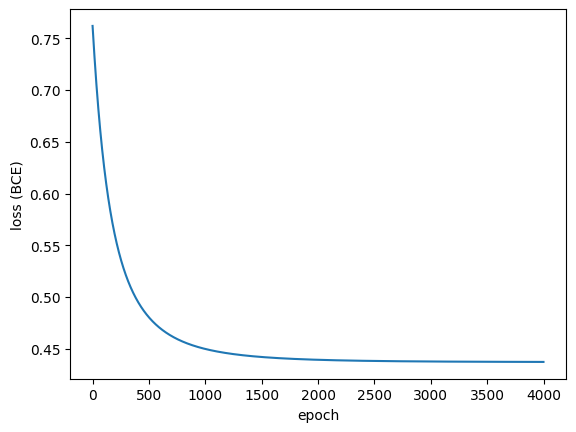

In [12]:
plt.plot(train_losses)

plt.xlabel('epoch')
plt.ylabel('loss (BCE)')

plt.show()

In [13]:
model.eval()
with torch.no_grad():

  y_pred = model(X_test)
  y_pred = (y_pred > 0.5).float()

  correct = (y_pred == y_test.view(-1, 1)).sum().item()
  accuracy = correct / y_test.size(0)

  print(f'Accuracy on test set: {100 * accuracy:.2f}%')

Accuracy on test set: 79.33%
